In [1]:
%load_ext sql

In [2]:
db_connect_str = 'postgresql://localhost:5432/store_demo'
%sql {db_connect_str}

In [3]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Replace 'your_connection_string' with your actual connection string
engine = create_engine(db_connect_str)

query = """
SELECT
    p.name AS product_name,
    o.order_date,
    SUM(oi.quantity) AS total_quantity
FROM
    orders o
JOIN order_items oi ON o.id = oi.order_id
JOIN products p ON oi.product_id = p.id
WHERE
    p.merchant_id = 1 AND o.order_date >= '2022-01-01' AND o.order_date <= '2022-01-31'
GROUP BY
    p.name, o.order_date
ORDER BY
    o.order_date;
"""

df = pd.read_sql_query(query, engine)


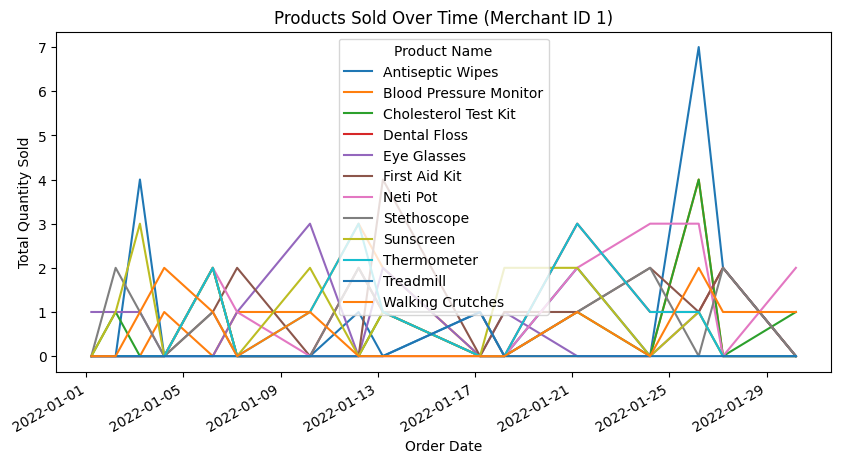

In [4]:
# Pivot the DataFrame to make order_date the index and columns for each product_name
pivot_df = df.pivot(index='order_date', columns='product_name', values='total_quantity').fillna(0)

# Plot the DataFrame
pivot_df.plot(kind='line', figsize=(10, 5))  # Adjust the figure size as needed

plt.title('Products Sold Over Time (Merchant ID 1)')
plt.xlabel('Order Date')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Product Name')
plt.show()

In [9]:
query = """
SELECT
    u.id,
    CONCAT(u.first_name, ' ', u.last_name) AS user_name,
    SUM(o.total_amount) AS total_spent
FROM
    orders o
JOIN payment_methods p ON p.id = o.payment_method_id
JOIN users u ON u.id = p.user_id
WHERE
    o.order_date BETWEEN '2022-01-01T00:00:00Z' AND '2022-07-01T00:00:00Z' AND p.merchant_id = 14    
GROUP BY
    u.id
ORDER BY
    total_spent DESC
LIMIT 20;
"""

df = pd.read_sql_query(query, engine)

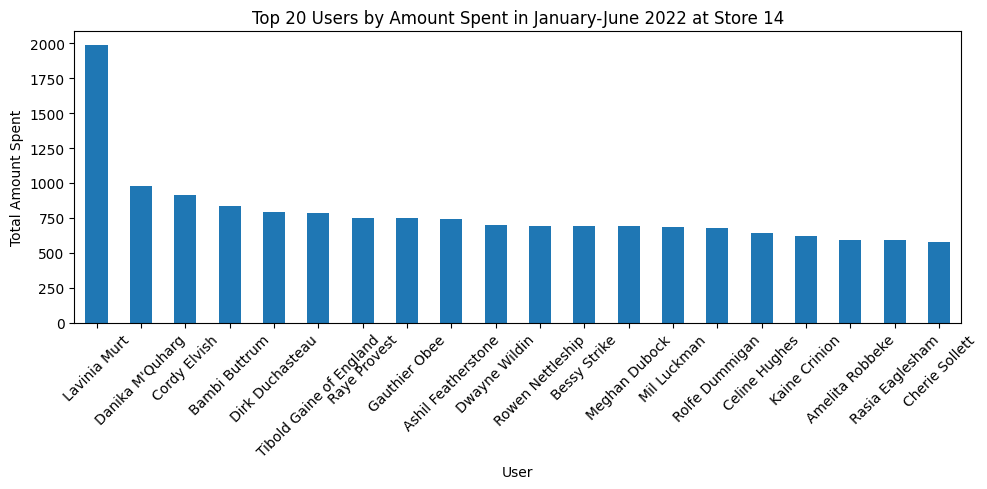

In [10]:
# Plot a bar chart
df.plot(kind='bar', x='user_name', y='total_spent', legend=False, figsize=(10, 5))

# Add some labels and title
plt.xlabel('User')
plt.ylabel('Total Amount Spent')
plt.title('Top 20 Users by Amount Spent in January-June 2022 at Store 14')
plt.xticks(rotation=45)  # Rotate the x labels to show them better
plt.tight_layout()  # Adjust layout to fit everything nicely

plt.show()

In [11]:
%sql select * from merchants limit 5;

 * postgresql://localhost:5432/store_demo
5 rows affected.


id,name
1,HealthEase Supplies
2,MedMart Essentials
3,FamilyCare Outfitters
4,Wellness Depot
5,Vitality Corner Store


In [12]:
%sql select * from products where merchant_id=3 limit 5;

 * postgresql://localhost:5432/store_demo
5 rows affected.


id,image,image_id,name,description,price,merchant_id
36,nasal_spray,2,Nasal Spray,Saline nasal spray for sinus relief,4.12,3
37,stethoscope,2,Stethoscope,Tool for listening to heartbeat and breathing,81.08,3
38,exercise_bike,3,Exercise Bike,Indoors cycling to improve cardiovascular health,842.49,3
39,thermometer_,1,Thermometer,Digital thermometer for precise temperature measurement,13.28,3
40,compression_socks,0,Compression Socks,Support socks for circulation improvement,41.83,3


In [13]:
import pandas as pd
from sqlalchemy import create_engine

# Create an engine instance
alchemyEngine = create_engine(db_connect_str, pool_recycle=3600);

# Use context manager to ensure the connection is closed
with alchemyEngine.connect() as dbConnection:
    df = pd.read_sql("select * from merchants limit 5", dbConnection)
    pd.set_option('display.expand_frame_repr', False)
    print(df)
    # Connection will be automatically closed when exiting the 'with' block



   id                   name
0   1    HealthEase Supplies
1   2     MedMart Essentials
2   3  FamilyCare Outfitters
3   4         Wellness Depot
4   5  Vitality Corner Store


In [14]:
%sql select products.name,products.description,quantity,price_at_time_of_order,(quantity*price_at_time_of_order) as sum from order_items inner join products on order_items.product_id=products.id where order_id=1;

 * postgresql://localhost:5432/store_demo
17 rows affected.


name,description,quantity,price_at_time_of_order,sum
Neti Pot,Sinus rinse kit for nasal irrigation,4,22.10,88.40
Glucose Monitoring System,Blood glucose meter for diabetes management,5,31.59,157.95
Sunscreen,Broad-spectrum UV protection sunscreen,3,18.94,56.82
Prenatal Vitamins,Daily vitamins for prenatal care,3,21.94,65.82
Walking Crutches,Mobility aids for walking support,3,77.04,231.12
Elastic Bandages,Elastic bandages for sprain treatment,5,4.03,20.15
Knee Brace,Stabilizing brace for knee joints,2,23.20,46.40
Eye Glasses,Prescription strength eye glasses,2,93.26,186.52
Ice Pack,Reusable gel ice pack for injuries,3,12.38,37.14
Thermometer,Digital thermometer for precise temperature measurement,1,27.22,27.22


In [15]:
%sql SELECT products.name, \
            products.description, \
            quantity, \
            '$' || price_at_time_of_order AS price, \
            '$' || (quantity * price_at_time_of_order)::text AS total \
     FROM order_items \
     INNER JOIN products ON order_items.product_id = products.id \
     WHERE order_id = 1;

 * postgresql://localhost:5432/store_demo
17 rows affected.


name,description,quantity,price,total
Neti Pot,Sinus rinse kit for nasal irrigation,4,$22.10,$88.40
Glucose Monitoring System,Blood glucose meter for diabetes management,5,$31.59,$157.95
Sunscreen,Broad-spectrum UV protection sunscreen,3,$18.94,$56.82
Prenatal Vitamins,Daily vitamins for prenatal care,3,$21.94,$65.82
Walking Crutches,Mobility aids for walking support,3,$77.04,$231.12
Elastic Bandages,Elastic bandages for sprain treatment,5,$4.03,$20.15
Knee Brace,Stabilizing brace for knee joints,2,$23.20,$46.40
Eye Glasses,Prescription strength eye glasses,2,$93.26,$186.52
Ice Pack,Reusable gel ice pack for injuries,3,$12.38,$37.14
Thermometer,Digital thermometer for precise temperature measurement,1,$27.22,$27.22
